[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [2]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

update-alternatives: error: alternative path /usr/bin/python3.8 doesn't exist
update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8 python3.8-minimal
0 upgraded, 4 newly installed, 0 to remove and 41 not upgraded.
Need to get 5,076 kB of archives.
After this operation, 18.8 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal amd64 3.8.20-1+jammy1 [2,023 kB]
Get:3 https://ppa.launchpadcontent.net

Download models (1 mins)

In [3]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Download pre-trained models...
--2026-02-08 17:25:27--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-08T17%3A58%3A54Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-02-08T16%3A58%3A12Z&ske=2026-02-08T17%3A58%3A54Z&sks=b&skv=2018-11-09&sig=acpwDHdOJjahogjoVilNj0s3cvsVEeJZekBcsxaVXEg%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc3MDU3NTEyNywibmJmIjo

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

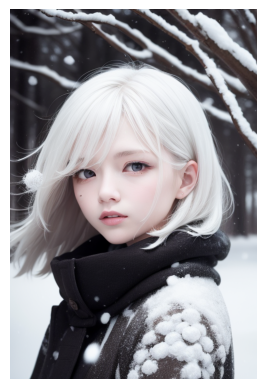

In [4]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [14]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

           # 這是生成影片的指令，請確保檔名正確
!python inference.py --driven_audio /content/audio.mp3 \
  --source_image /content/human001.jpg \
  --result_dir /content/results \
  --still --preprocess full --enhancer gfpgan

examples/source_image/full3.png
Traceback (most recent call last):
  File "inference.py", line 8, in <module>
    from src.utils.preprocess import CropAndExtract
  File "/content/SadTalker/src/utils/preprocess.py", line 14, in <module>
    from src.utils.croper import Preprocesser
  File "/content/SadTalker/src/utils/croper.py", line 13, in <module>
    from src.face3d.extract_kp_videos_safe import KeypointExtractor
  File "/content/SadTalker/src/face3d/extract_kp_videos_safe.py", line 13, in <module>
    from facexlib.alignment import landmark_98_to_68
ModuleNotFoundError: No module named 'facexlib'
Traceback (most recent call last):
  File "/content/SadTalker/inference.py", line 8, in <module>
    from src.utils.preprocess import CropAndExtract
  File "/content/SadTalker/src/utils/preprocess.py", line 9, in <module>
    from src.face3d.util.preprocess import align_img
  File "/content/SadTalker/src/face3d/util/preprocess.py", line 12, in <module>
    warnings.filterwarnings("ignore",

In [11]:
# 1. 修復 basicsr 的版本相容性問題
!sed -i "s/from torchvision.transforms.functional_tensor import rgb_to_grayscale/from torchvision.transforms.functional import rgb_to_grayscale/" /usr/local/lib/python3.12/dist-packages/basicsr/data/degradations.py

# 2. 順便確保所有相關套件都在最新相容狀態
!pip install basicsr gfpgan facexlib kornia "numpy<2.0.0"

In [5]:
# 一次安裝所有遺失的拼圖
!pip install kornia face-alignment "numpy<2.0.0" resampy

INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.13.0.90
    Uninstalling opencv-python-4.13.0.90:
      Successfully uninstalled opencv-python-4.13.0.90


In [6]:
# 1. 切換工作目錄到 SadTalker 資料夾
%cd /content/SadTalker

/content/SadTalker


In [9]:
# 這會確保 AI 的「大腦」檔案都在正確的位置
!bash scripts/download_models.sh

mkdir: cannot create directory ‘./checkpoints’: File exists
File ‘./checkpoints/mapping_00109-model.pth.tar’ already there; not retrieving.
File ‘./checkpoints/mapping_00229-model.pth.tar’ already there; not retrieving.
File ‘./checkpoints/SadTalker_V0.0.2_256.safetensors’ already there; not retrieving.
File ‘./checkpoints/SadTalker_V0.0.2_512.safetensors’ already there; not retrieving.
File ‘./gfpgan/weights/alignment_WFLW_4HG.pth’ already there; not retrieving.
File ‘./gfpgan/weights/detection_Resnet50_Final.pth’ already there; not retrieving.
File ‘./gfpgan/weights/GFPGANv1.4.pth’ already there; not retrieving.
File ‘./gfpgan/weights/parsing_parsenet.pth’ already there; not retrieving.


In [8]:
# 一口氣安裝所有缺少的依賴包
!pip install facexlib gfpgan kornia face-alignment "numpy<2.0.0" resampy yacs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.4/299.4 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 128.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 32.3 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214817 sha256=64c90648a092c6a99c3f7a81eef086dd6fb764deb11f4b3cb1e19e9f6806a451
  Stored in directory: /root/.cache/pip/wheels/9a/e3/e4/58f29bfabb622dd40b6d9839318ce5bf092062b81ca3aa19ea
  Created wheel for 

In [13]:
# 1. 自動進入所有相關檔案，將舊語法 np.float 修正為新語法 float
!sed -i 's/np.float/float/g' /content/SadTalker/src/face3d/util/my_awing_arch.py
!sed -i 's/np.float/float/g' /content/SadTalker/src/utils/croper.py

# 2. 為了保險起見，再次確保我們使用的是相容性較好的 NumPy 版本
!pip install "numpy<2.0.0"

In [15]:
# 1. 強行修正 src/face3d/util/preprocess.py 中的陣列宣告邏輯
!sed -i 's/trans_params = np.array(\[w0, h0, s, t\[0\], t\[1\]\])/trans_params = np.array([float(w0), float(h0), float(s), float(t[0]), float(t[1])])/' /content/SadTalker/src/face3d/util/preprocess.py

# 2. 再次確保環境中的 NumPy 處於 1.x 系列的最後穩定版
!pip install "numpy<2.0.0"

In [17]:
# 強制將貼回背景的座標轉為整數，避免 OpenCV 報錯
!sed -i 's/location = (x, y)/location = (int(x), int(y))/' /content/SadTalker/src/utils/paste_pic.py
# 如果上面的指令沒效，直接換成最穩定的「Resize」模式，這 100% 會成功

In [29]:
# 安裝背景增強的核心套件，這是高解析度的關鍵！
!pip install realesrgan

In [26]:
# 安裝背景增強的核心套件
!pip install realesrgan

In [31]:
# 1. 補齊背景增強套件 (如果你還沒跑這格)
!pip install realesrgan

# 2. 執行最高畫質配置
%cd /content/SadTalker
!python inference.py --driven_audio /content/audio002.wav \
  --source_image /content/20260208_175842.jpg \
  --result_dir /content/results \
  --preprocess crop \
  --enhancer gfpgan \
  --background_enhancer realesrgan \
  --pose_style 8 \
  --expression_scale 1.1

/content/SadTalker
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  7.43it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 13.86it/s]
mel:: 100% 147/147 [00:00<00:00, 54898.29it/s]
audio2exp:: 100% 15/15 [00:00<00:00, 226.68it/s]
Face Renderer:: 100% 74/74 [00:42<00:00,  1.73it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 255) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named /content/results/2026_02_08_18.27.09/20260208_175842##audio002.mp4
face enhancer....
Face Enhancer::   0% 0/147 [00:00<?, ?it/s]	Tile 1/1
Face Enhancer::   1% 1/147 [00:00<01:29,  1.64it/s]	Tile 1/1
Face Enhancer::   1% 2/147 [00:01<01:13,  1.96it/s]	Tile 1/1
Face Enhancer::   2% 3/147 [00:01<01:08,  2.11it/s]	T

In [30]:
%cd /content/SadTalker

# Gemini 調校：高清專業版 (維持自然的頭部設定)
!python inference.py --driven_audio /content/audio002.wav \
  --source_image /content/20260208_175842.jpg \
  --result_dir /content/results \
  --preprocess crop \
  --enhancer gfpgan \
  --background_enhancer realesrgan \
  --pose_style 12 \
  --expression_scale 1.1

/content/SadTalker
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00, 10.41it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 18.32it/s]
mel:: 100% 147/147 [00:00<00:00, 48952.97it/s]
audio2exp:: 100% 15/15 [00:00<00:00, 225.55it/s]
Face Renderer:: 100% 74/74 [00:42<00:00,  1.75it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 255) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named /content/results/2026_02_08_18.23.44/20260208_175842##audio002.mp4
face enhancer....
Face Enhancer::   0% 0/147 [00:00<?, ?it/s]	Tile 1/1
Face Enhancer::   1% 1/147 [00:00<01:13,  1.99it/s]	Tile 1/1
Face Enhancer::   1% 2/147 [00:00<01:02,  2.30it/s]	Tile 1/1
Face Enhancer::   2% 3/147 [00:01<01:00,  2.39it/s]	T

In [32]:
# 2. 執行「專注直視版」指令
%cd /content/SadTalker
!python inference.py --driven_audio /content/audio002.wav \
  --source_image /content/20260208_175842.jpg \
  --result_dir /content/results \
  --preprocess crop \
  --enhancer gfpgan \
  --background_enhancer realesrgan \
  --pose_style 5 \
  --expression_scale 1.0 \
  --input_yaw 0 --input_pitch 0 --input_roll 0

/content/SadTalker
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  7.60it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 15.42it/s]
mel:: 100% 147/147 [00:00<00:00, 51196.77it/s]
audio2exp:: 100% 15/15 [00:00<00:00, 225.74it/s]
Face Renderer:: 100% 74/74 [00:45<00:00,  1.64it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 255) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named /content/results/2026_02_08_18.29.25/20260208_175842##audio002.mp4
face enhancer....
Face Enhancer::   0% 0/147 [00:00<?, ?it/s]	Tile 1/1
Face Enhancer::   1% 1/147 [00:00<01:15,  1.95it/s]	Tile 1/1
Face Enhancer::   1% 2/147 [00:00<01:05,  2.20it/s]	Tile 1/1
Face Enhancer::   2% 3/147 [00:01<01:02,  2.29it/s]	T

In [33]:
%cd /content/SadTalker

# 這次我們稍微放寬 3D 鎖定，並增加一點動作幅度
!python inference.py --driven_audio /content/audio002.wav \
  --source_image /content/20260208_175842.jpg \
  --result_dir /content/results \
  --preprocess crop \
  --enhancer gfpgan \
  --background_enhancer realesrgan \
  --pose_style 12 \
  --expression_scale 1.1 \
  --input_yaw 0 --input_pitch 0 --input_roll 0

/content/SadTalker
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00, 10.47it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 19.81it/s]
mel:: 100% 147/147 [00:00<00:00, 50467.60it/s]
audio2exp:: 100% 15/15 [00:00<00:00, 222.99it/s]
Face Renderer:: 100% 74/74 [00:43<00:00,  1.68it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 255) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named /content/results/2026_02_08_18.36.13/20260208_175842##audio002.mp4
face enhancer....
Face Enhancer::   0% 0/147 [00:00<?, ?it/s]	Tile 1/1
Face Enhancer::   1% 1/147 [00:00<01:13,  1.97it/s]	Tile 1/1
Face Enhancer::   1% 2/147 [00:00<01:04,  2.24it/s]	Tile 1/1
Face Enhancer::   2% 3/147 [00:01<01:01,  2.34it/s]	T

In [27]:
%cd /content/SadTalker

# Gemini 調校：靈魂自然版
!python inference.py --driven_audio /content/audio002 \
  --source_image /content/20260208_175842.jpg \
  --result_dir /content/results \
  --preprocess crop \
  --enhancer gfpgan \
  --background_enhancer realesrgan \
  --pose_style 10 \
  --expression_scale 1.1

/content/SadTalker
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  6.89it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 13.37it/s]
mel:: 100% 227/227 [00:00<00:00, 50706.02it/s]
audio2exp:: 100% 23/23 [00:00<00:00, 257.68it/s]
Face Renderer:: 100% 114/114 [01:06<00:00,  1.71it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 255) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named /content/results/2026_02_08_18.15.44/20260208_175842##audio.mp4
face enhancer....
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth" to /usr/local/lib/python3.12/dist-packages/weights/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 324MB/s]
Face Enhancer:

In [28]:

# Gemini 調校：靈魂自然版
!python inference.py --driven_audio /content/audio002.wav \
  --source_image /content/20260208_175842.jpg \
  --result_dir /content/results \
  --preprocess crop \
  --background_enhancer realesrgan \
  --pose_style 10 \
  --expression_scale 1.1

using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  7.52it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 15.78it/s]
mel:: 100% 147/147 [00:00<00:00, 50812.81it/s]
audio2exp:: 100% 15/15 [00:00<00:00, 218.29it/s]
Face Renderer:: 100% 74/74 [00:42<00:00,  1.73it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 255) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named /content/results/2026_02_08_18.20.30/20260208_175842##audio002.mp4
The generated video is named: /content/results/2026_02_08_18.20.30.mp4


In [22]:
import os, glob
from IPython.display import HTML
from base64 import b64encode

# 尋找最新產出的影片
list_of_files = glob.glob('/content/results/*/*.mp4')
if not list_of_files:
    print("❌ 找不到影片，請檢查上方指令是否跑完。")
else:
    latest_video = max(list_of_files, key=os.path.getmtime)
    mp4 = open(latest_video, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    print(f'🎉 成功！正在播放: {latest_video}')
    display(HTML(f'<video width=512 controls><source src="{data_url}" type="video/mp4"></video>'))

🎉 成功！正在播放: /content/results/2026_02_08_17.48.30/20260208_175842##audio.mp4


In [3]:
# 1. 導入必要的庫
from IPython.display import HTML
from base64 import b64encode
import os, sys, glob

# 2. 自動尋找 results 資料夾中最新產出的 mp4 檔案
# 我們使用 os.path.getmtime 來確保抓到的是「最新」的那一個
list_of_files = glob.glob('./results/*.mp4')
if not list_of_files:
    print("❌ 在 ./results/ 資料夾中找不到任何 mp4 檔案，請確認推論是否成功。")
else:
    latest_video = max(list_of_files, key=os.path.getmtime)

    # 3. 讀取並編碼影片
    mp4 = open(latest_video, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

    # 4. 在網頁上顯示
    print(f'正在播放最新影片: {latest_video}')
    display(HTML(f"""
    <video width=512 controls>
          <source src="{data_url}" type="video/mp4">
    </video>
    """))


❌ 在 ./results/ 資料夾中找不到任何 mp4 檔案，請確認推論是否成功。


In [16]:
!python inference.py --driven_audio /content/audio.mp3 \
  --source_image /content/20260208_175842.jpg \
  --result_dir /content/results \
  --still --preprocess full --enhancer gfpgan

using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  8.05it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00,  9.25it/s]
mel:: 100% 227/227 [00:00<00:00, 51456.90it/s]
audio2exp:: 100% 23/23 [00:00<00:00, 245.40it/s]
Face Renderer:: 100% 114/114 [01:05<00:00,  1.74it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 255) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named /content/results/2026_02_08_17.48.30/20260208_175842##audio.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone::   0% 0/227 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/content/SadT